In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D

In [29]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [30]:
train_images = train_images / 255.
test_images = test_images / 255.

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [31]:
model = Sequential([
          Conv2D(8, kernel_size=3, padding='SAME', input_shape=train_images[0].shape),
          MaxPooling2D((2, 2)),
          Flatten(),
          Dense(64, activation='relu'),
          Dense(64, activation='relu'),
          Dense(10, activation='softmax')
    ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                100416    
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(train_images, train_labels, epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 17s - loss: 0.2541 - accuracy: 0.9245 - 17s/epoch - 9ms/step
Epoch 2/5
1875/1875 - 17s - loss: 0.1026 - accuracy: 0.9683 - 17s/epoch - 9ms/step
Epoch 3/5
1875/1875 - 17s - loss: 0.0718 - accuracy: 0.9778 - 17s/epoch - 9ms/step
Epoch 4/5
1875/1875 - 17s - loss: 0.0543 - accuracy: 0.9827 - 17s/epoch - 9ms/step
Epoch 5/5
1875/1875 - 17s - loss: 0.0412 - accuracy: 0.9864 - 17s/epoch - 9ms/step


In [34]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,0.254132,0.924467
1,0.102616,0.968333
2,0.071764,0.977767
3,0.054309,0.982717
4,0.041161,0.986400


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

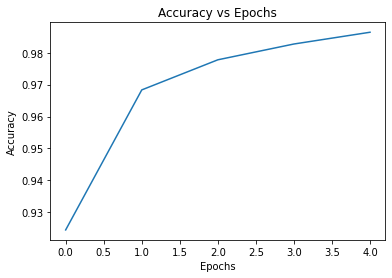

In [35]:
acc_plot = df.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [36]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0608 - accuracy: 0.9801


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

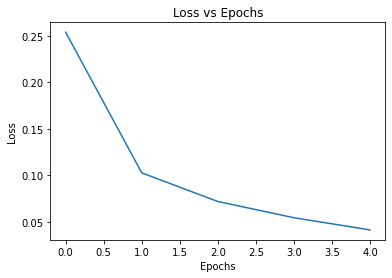

In [38]:
acc_plot = df.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

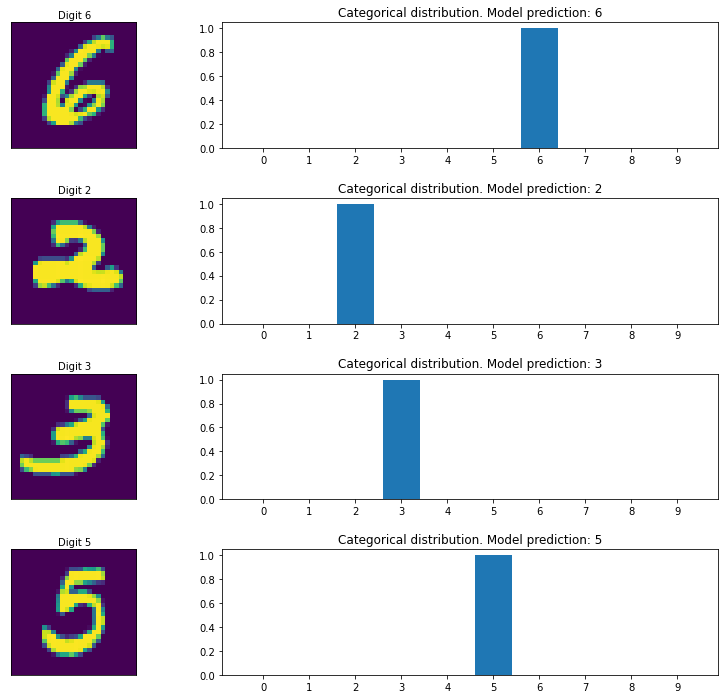

In [43]:
num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()